In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ni, nj = 180,90

In [3]:
# Center positions
x1,y1 = numpy.arange(0.5/ni, 1., 1/ni), numpy.arange(0.5/nj, 1., 1/nj)
x,y = numpy.meshgrid(x1,y1)
# Corner positions
xq1, yq1 = numpy.arange(0., 1.+0.5/ni, 1/ni), numpy.arange(0., 1.+0.5/nj, 1/nj)
xq,yq = numpy.meshgrid(xq1,yq1)

In [4]:
def cosbell(x,L):
    """A cosine-bell function"""
    return 0.5 * ( 1. + numpy.cos( numpy.pi * ( numpy.minimum( numpy.abs(x)/L, 1. ) ) ) )
def spike(x,L):
    """A smooth-ish spike function"""
    return 1. - numpy.sin( numpy.pi * ( numpy.minimum( numpy.abs(x)/L, 0.5 ) ) )

In [5]:
def D(x,y):
    """Returns a non-dimensional depth (0..1) at non-dimensional position x,y."""
    D = 1 + 0*x # Initialise to flat
    D += -(1.2*spike(x,0.2)+1.2*spike(x-1,0.2))*spike(numpy.minimum(0,y-.3),0.2) # South America
    D += -1.2*spike(x-0.5,0.2)*spike(numpy.minimum(0,y-.55),0.2) #Africa
    D += -1.1*spike(y-1,0.12)-.1*spike(y,0.12) # The great northern wald Antarctica
    D += -1.2*(spike(x,0.1)+spike(x-1,0.12))*spike(numpy.maximum(0,y-.06),0.12) # Antarctic Peninsula
    D += -0.1*(cosbell(x,0.1)+cosbell(x-1,0.1)) # Drake Passage ridge 
    D += -0.5*cosbell(x-0.16,0.05)*cosbell(y-0.18,0.13)**0.4 # Scotia Arc East
    D += -0.4*cosbell(x-0.09,0.08)**0.4*cosbell(y-0.26,0.05) # Scotia Arc North
    D += -0.4*cosbell(x-0.08,0.08)**0.4*cosbell(y-0.1,0.05) # Scotia Arc South
    D += -0.05*numpy.cos(14*numpy.pi*x)*numpy.sin(14*numpy.pi*y) #roughness
    D += -0.05*numpy.cos(20*numpy.pi*x)*numpy.cos(20*numpy.pi*y) #roughness
    D[D<0] = 0
    D[D>1] = 1
    return D

In [6]:
latq, lonq = -65 + 50*y, 0 + 90*x

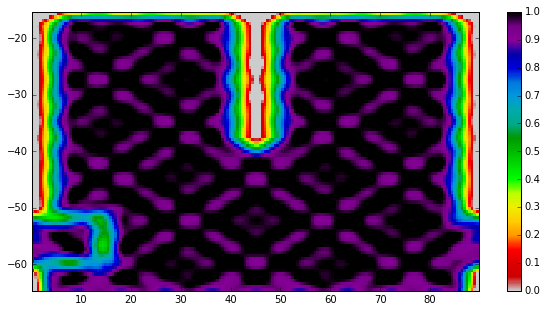

In [7]:
plt.figure(figsize=(10,5))
plt.pcolormesh( lonq, latq , D(x,y), cmap=plt.cm.spectral_r )
plt.xlim( lonq.min(), lonq.max())
plt.ylim( latq.min(), latq.max())
plt.colorbar();